In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Download or copy annotation files to new directory

### Get the updated cCRE calls (`v4`)
These were used by David and co for the sgRNA library design. Have ~2x as many cCREs as v3. Downloaded 2023/04/12.

In [2]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations
# cp /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/annotations/GRCh38-cCREs.bed encode.ccres.v3.hg38.bed

In [3]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations
# wget -O encode.ccres.v4.hg38.bed.gz http://users.wenglab.org/moorej3/Registry-cCREs-WG/V4-Files/GRCh38-cCREs.V4.bed.gz --no-check-certificate

In [24]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations
# gunzip encode.ccres.v4.hg38.bed.gz
# wc -l encode.ccres.v4.hg38.bed
# gzip encode.ccres.v4.hg38.bed

2348854 encode.ccres.v4.hg38.bed


In [ ]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations
# wget -O k562.ccres.v4.hg38.bed.gz http://users.wenglab.org/moorej3/Registry-cCREs-WG/V4-Files/ENCFF414OGC_ENCFF806YEZ_ENCFF849TDM_ENCFF736UDR.bed.gz  --no-check-certificate

In [25]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations
# gunzip k562.ccres.v4.hg38.bed.gz
# wc -l k562.ccres.v4.hg38.bed
# gzip k562.ccres.v4.hg38.bed

2348854 k562.ccres.v4.hg38.bed


### Chromatin accessibility

In [5]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations
# cp /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz .

## Intersect with annotations

### ENCODE cCREs (`v3` and `v4`), all biosamples, direction intersection

#### v3, Perturbed

In [4]:
%%bash
module load bedtools2

bedtools intersect \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementReference/combined/binnedgenome.int.elementReference.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v3.hg38.bed \
-wa -u | wc -l 

8709


#### v3, Significant

In [5]:
%%bash
module load bedtools2

bedtools intersect \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v3.hg38.bed \
-wa -u | wc -l

2058


#### v4, Perturbed

In [6]:
%%bash
module load bedtools2

bedtools intersect \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementReference/combined/binnedgenome.int.elementReference.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

15817


#### v4, Significant

In [7]:
%%bash
module load bedtools2

bedtools intersect \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-wa -u | wc -l

2547


#### For v4, get the number of cCREs per region perturbed or significant

In [8]:
%%bash
module load bedtools2

bedtools intersect \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementReference/combined/binnedgenome.int.elementReference.20230411.merge.bed \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-c > /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementReference.20230411.merge.int.cCREs.count.txt

In [9]:
%%bash
module load bedtools2

bedtools intersect \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-c > /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.int.cCREs.count.txt

#### Calculate percent of cCREs perturbed and percent of perturbed cCREs that overlapped a significant element

In [10]:
15817/2348854*100

0.6733922159487137

In [11]:
2547/15817*100

16.10292723019536

#### Plot distribution of cCREs per perturbed and per significant element

In [12]:
df1 = pd.read_csv('/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementReference.20230411.merge.int.cCREs.count.txt',
                   sep='\t', header = None)

df1.columns = ['chr', 'start', 'end', 'cCRE_count']
df1['region_type'] = "perturbed"
df1.head()

,chr,start,end,cCRE_count,region_type
0,chr2,46464400,46464900,1,perturbed
1,chr2,46499600,46500700,3,perturbed
2,chr2,46541500,46542900,4,perturbed
3,chr2,46543000,46544500,5,perturbed
4,chr2,46554900,46555600,1,perturbed


In [13]:
df2 = pd.read_csv('/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.int.cCREs.count.txt',
                   sep='\t', header = None)

df2.columns = ['chr', 'start', 'end', 'cCRE_count']
df2['region_type'] = "significant"
df2.head()

,chr,start,end,cCRE_count,region_type
0,chr1,1411500,1411800,2,significant
1,chr1,3675300,3676000,3,significant
2,chr1,6475300,6475700,2,significant
3,chr1,6859300,6861400,4,significant
4,chr1,8049700,8050700,1,significant


In [14]:
plotdf = pd.concat([df1, df2], sort = False)
plotdf.head()

,chr,start,end,cCRE_count,region_type
0,chr2,46464400,46464900,1,perturbed
1,chr2,46499600,46500700,3,perturbed
2,chr2,46541500,46542900,4,perturbed
3,chr2,46543000,46544500,5,perturbed
4,chr2,46554900,46555600,1,perturbed


In [15]:
plotdf[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                                 
                 count      mean        std  min  25%  50%  75%     max
region_type                                                            
perturbed       3062.0  5.181581  80.046566  0.0  1.0  2.0  4.0  4386.0
significant      865.0  2.949133   3.168450  0.0  1.0  2.0  3.0    32.0

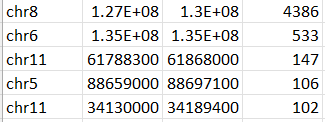
 
Presumably these are tiling screens (and after merging adjacent regions), the majority of the locus is targeted.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aea670d0e48>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

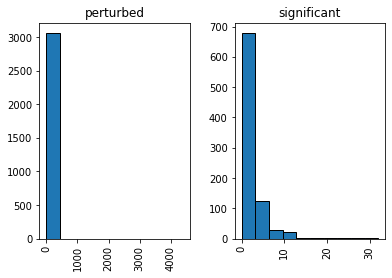

In [27]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf['cCRE_count'].hist(by=plotdf['region_type'], edgecolor='black') 

In [28]:
plotdf_sub = plotdf.loc[(plotdf["cCRE_count"] < 500)]
plotdf_sub.head()

,chr,start,end,cCRE_count,region_type
0,chr2,46464400,46464900,1,perturbed
1,chr2,46499600,46500700,3,perturbed
2,chr2,46541500,46542900,4,perturbed
3,chr2,46543000,46544500,5,perturbed
4,chr2,46554900,46555600,1,perturbed


In [29]:
plotdf_sub[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                               
                 count      mean       std  min  25%  50%  75%    max
region_type                                                          
perturbed       3060.0  3.577451  6.647542  0.0  1.0  2.0  4.0  147.0
significant      865.0  2.949133  3.168450  0.0  1.0  2.0  3.0   32.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aea671cc0b8>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

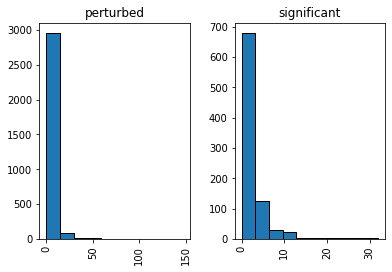

In [30]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf_sub['cCRE_count'].hist(by=plotdf_sub['region_type'], edgecolor='black') 

In [31]:
plotdf_sub = plotdf.loc[(plotdf["cCRE_count"] < 100)]
plotdf_sub.head()

,chr,start,end,cCRE_count,region_type
0,chr2,46464400,46464900,1,perturbed
1,chr2,46499600,46500700,3,perturbed
2,chr2,46541500,46542900,4,perturbed
3,chr2,46543000,46544500,5,perturbed
4,chr2,46554900,46555600,1,perturbed


In [32]:
plotdf_sub[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                              
                 count      mean       std  min  25%  50%  75%   max
region_type                                                         
perturbed       3057.0  3.464835  5.557601  0.0  1.0  2.0  4.0  82.0
significant      865.0  2.949133  3.168450  0.0  1.0  2.0  3.0  32.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aea672a9a20>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

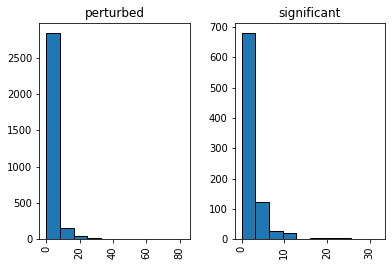

In [33]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf_sub['cCRE_count'].hist(by=plotdf_sub['region_type'], edgecolor='black') 

### ENCODE cCREs (only `v4`), all biosamples, window +/- 100bp

#### v4, Perturbed

In [34]:
%%bash
module load bedtools2

bedtools window \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementReference/combined/binnedgenome.int.elementReference.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-w 100 | wc -l

16484


#### v4, Significant

In [35]:
%%bash
module load bedtools2

bedtools window \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-w 100 | wc -l

2842


#### For v4, get the number of cCREs per region perturbed or significant

In [36]:
%%bash
module load bedtools2

bedtools window \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementReference/combined/binnedgenome.int.elementReference.20230411.merge.bed \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-c -w 100 > /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementReference.20230411.merge.window100.cCREs.count.txt

In [37]:
%%bash
module load bedtools2

bedtools window \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/encode.ccres.v4.hg38.bed.gz \
-c -w 100 > /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.window100.cCREs.count.txt

#### Calculate percent of cCREs perturbed and percent of perturbed cCREs that overlapped a significant element

In [38]:
16484/2348854*100

0.7017890426565466

In [40]:
2842/16484*100

17.240960931812666

#### Plot distribution of cCREs per perturbed and per significant element

In [41]:
df1 = pd.read_csv('/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementReference.20230411.merge.window100.cCREs.count.txt',
                   sep='\t', header = None)

df1.columns = ['chr', 'start', 'end', 'cCRE_count']
df1['region_type'] = "perturbed"
df1.head()

,chr,start,end,cCRE_count,region_type
0,chr2,46464400,46464900,1,perturbed
1,chr2,46499600,46500700,3,perturbed
2,chr2,46541500,46542900,4,perturbed
3,chr2,46543000,46544500,5,perturbed
4,chr2,46554900,46555600,1,perturbed


In [42]:
df2 = pd.read_csv('/data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/outs/binnedgenome.int.elementQuant.20230411.merge.window100.cCREs.count.txt',
                   sep='\t', header = None)

df2.columns = ['chr', 'start', 'end', 'cCRE_count']
df2['region_type'] = "significant"
df2.head()

,chr,start,end,cCRE_count,region_type
0,chr1,1411500,1411800,2,significant
1,chr1,3675300,3676000,3,significant
2,chr1,6475300,6475700,2,significant
3,chr1,6859300,6861400,5,significant
4,chr1,8049700,8050700,1,significant


In [43]:
plotdf = pd.concat([df1, df2], sort = False)
plotdf.head()

,chr,start,end,cCRE_count,region_type
0,chr2,46464400,46464900,1,perturbed
1,chr2,46499600,46500700,3,perturbed
2,chr2,46541500,46542900,4,perturbed
3,chr2,46543000,46544500,5,perturbed
4,chr2,46554900,46555600,1,perturbed


In [44]:
plotdf[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                                 
                 count      mean        std  min  25%  50%  75%     max
region_type                                                            
perturbed       3062.0  5.383410  80.043417  0.0  1.0  2.0  4.0  4386.0
significant      865.0  3.285549   3.209230  0.0  2.0  3.0  4.0    32.0

chr8:127184400-130337400 = 4386 <br>
chr6:134923800-135476900 = 533 <br>
Presumably these are tiling screens (and after merging adjacent regions), the majority of the locus is targeted.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aea67384550>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

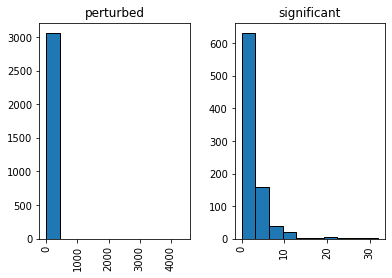

In [45]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf['cCRE_count'].hist(by=plotdf['region_type'], edgecolor='black') 

In [49]:
plotdf_sub = plotdf.loc[(plotdf["cCRE_count"] < 100)]
plotdf_sub.head()

,chr,start,end,cCRE_count,region_type
0,chr2,46464400,46464900,1,perturbed
1,chr2,46499600,46500700,3,perturbed
2,chr2,46541500,46542900,4,perturbed
3,chr2,46543000,46544500,5,perturbed
4,chr2,46554900,46555600,1,perturbed


In [50]:
plotdf_sub[["cCRE_count","region_type"]].groupby('region_type').describe()

cCRE_count                                              
                 count      mean       std  min  25%  50%  75%   max
region_type                                                         
perturbed       3057.0  3.666994  5.574607  0.0  1.0  2.0  4.0  82.0
significant      865.0  3.285549  3.209230  0.0  2.0  3.0  4.0  32.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2aea67508be0>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

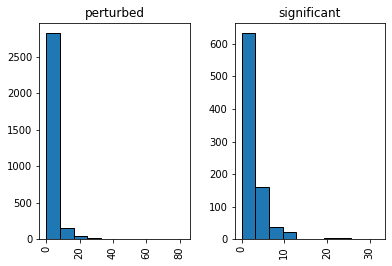

In [51]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plotdf_sub['cCRE_count'].hist(by=plotdf_sub['region_type'], edgecolor='black') 

### Intersect with union DHSs

File downloaded 2022-04-30 from UCSC table browser. <br>
Notebook to prepare bed file: `20220430.encode.Figure1MetaAnalysis.AnnotationFiles.LRB`

In [52]:
# %%bash
# cd /data/gersbachlab/lrb53/encodeCrisprWG/figure1meta/annotations
# gunzip wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz
# wc -l wgEncodeRegDnaseClustered.full.bed.hg38.bed
# gzip wgEncodeRegDnaseClustered.full.bed.hg38.bed

In [53]:
%%bash
module load bedtools2

bedtools intersect \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementReference/combined/binnedgenome.int.elementReference.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u | wc -l

13713


In [54]:
%%bash
module load bedtools2

bedtools intersect \
-b /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/figure1/allmeta/elementQuant/combined/binnedgenome.int.elementQuant.20230411.merge.bed \
-a /data/gersbachlab/lrb53/encodeCrisprWG/finalversion/annotations/wgEncodeRegDnaseClustered.full.bed.hg38.bed.gz \
-wa -u | wc -l

2072


In [55]:
13713/2113371*100

0.6488685611754869

In [56]:
2072/13713*100

15.109749872383867